In [1]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the data
baseline_data = pd.read_csv('baseline_survey_data.csv')
endline_data = pd.read_csv('endline_survey_data.csv')
random_assignment_data = pd.read_csv('random_assignment_data.csv')
# Merge the dataframes
merged_data = baseline_data.merge(endline_data, on='Participant_ID', how='left')
full_merged_data = pd.merge(merged_data, random_assignment_data, on='Participant_ID')
cleaned_data = full_merged_data.dropna()
cleaned_data.head()

,Participant_ID,Age,Gender,Location,Education,Race,Employment_Status,Attitude_Towards_Vaccines,Education_Level,Attitude_Adjusted,Previous_Vaccine_Status,Vaccinated_After_Baseline,Assigned_Group
2,3,52.0,Male,Texas,Less than high school,Hispanic or Latino,Unemployed,5,Less than high school,4.5,No,Yes,Control
3,4,27.0,Male,New Jersey,High school graduate,White,Retired,4,High school graduate,4.0,Yes,Yes,Control
10,11,28.0,Female,California,Some college,White,Retired,5,Some college,5.5,No,Yes,Emotion Ad
12,13,27.0,Male,Nebraska,Bachelor's degree,White,Unemployed,4,Bachelor's degree,5.0,No,No,Reason Ad
14,15,38.0,Male,California,Graduate degree,White,Employed,5,Graduate degree,6.5,No,Yes,Emotion Ad


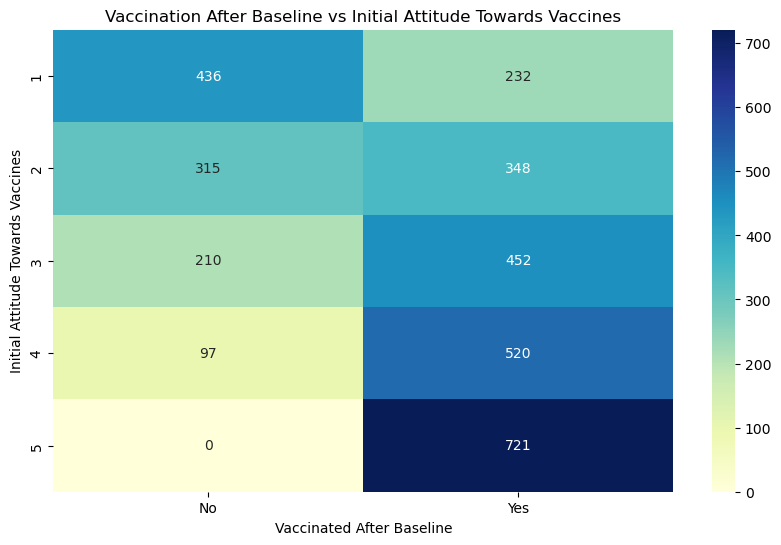

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crosstabulation of attitudes and vaccination status
attitude_vaccination_crosstab = pd.crosstab(cleaned_data['Attitude_Towards_Vaccines'], cleaned_data['Vaccinated_After_Baseline'])

# Assuming the categories in 'Vaccinated_After_Baseline' are 'Yes' and 'No'
vaccinated_categories = ['No', 'Yes']

# Plot with correct category labels
plt.figure(figsize=(10, 6))
sns.heatmap(attitude_vaccination_crosstab, annot=True, fmt="d", cmap="YlGnBu", xticklabels=vaccinated_categories)
plt.title("Vaccination After Baseline vs Initial Attitude Towards Vaccines")
plt.xlabel("Vaccinated After Baseline")
plt.ylabel("Initial Attitude Towards Vaccines")
plt.show()

Correlation Between Attitude and Vaccination

The distribution of responses across different attitude scores can give insights into the general sentiment towards vaccination in the surveyed population.


In [3]:
# Convert 'Vaccinated_After_Baseline' to numeric values: 'Yes' -> 1, 'No' -> 0
cleaned_data['Previous_Vaccine_Status'] = cleaned_data['Previous_Vaccine_Status'].replace({'Yes': 1, 'No': 0})

# Now perform the groupby and aggregation
age_group_analysis = cleaned_data.groupby('Age').agg({'Previous_Vaccine_Status': 'mean'})
gender_analysis = cleaned_data.groupby('Gender').agg({'Previous_Vaccine_Status': 'mean'})
race_analysis = cleaned_data.groupby('Race').agg({'Previous_Vaccine_Status': 'mean'})
employment_status_analysis = cleaned_data.groupby('Employment_Status').agg({'Previous_Vaccine_Status': 'mean'})

C:\Users\pc\AppData\Local\Temp/ipykernel_52088/880612604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Previous_Vaccine_Status'] = cleaned_data['Previous_Vaccine_Status'].replace({'Yes': 1, 'No': 0})


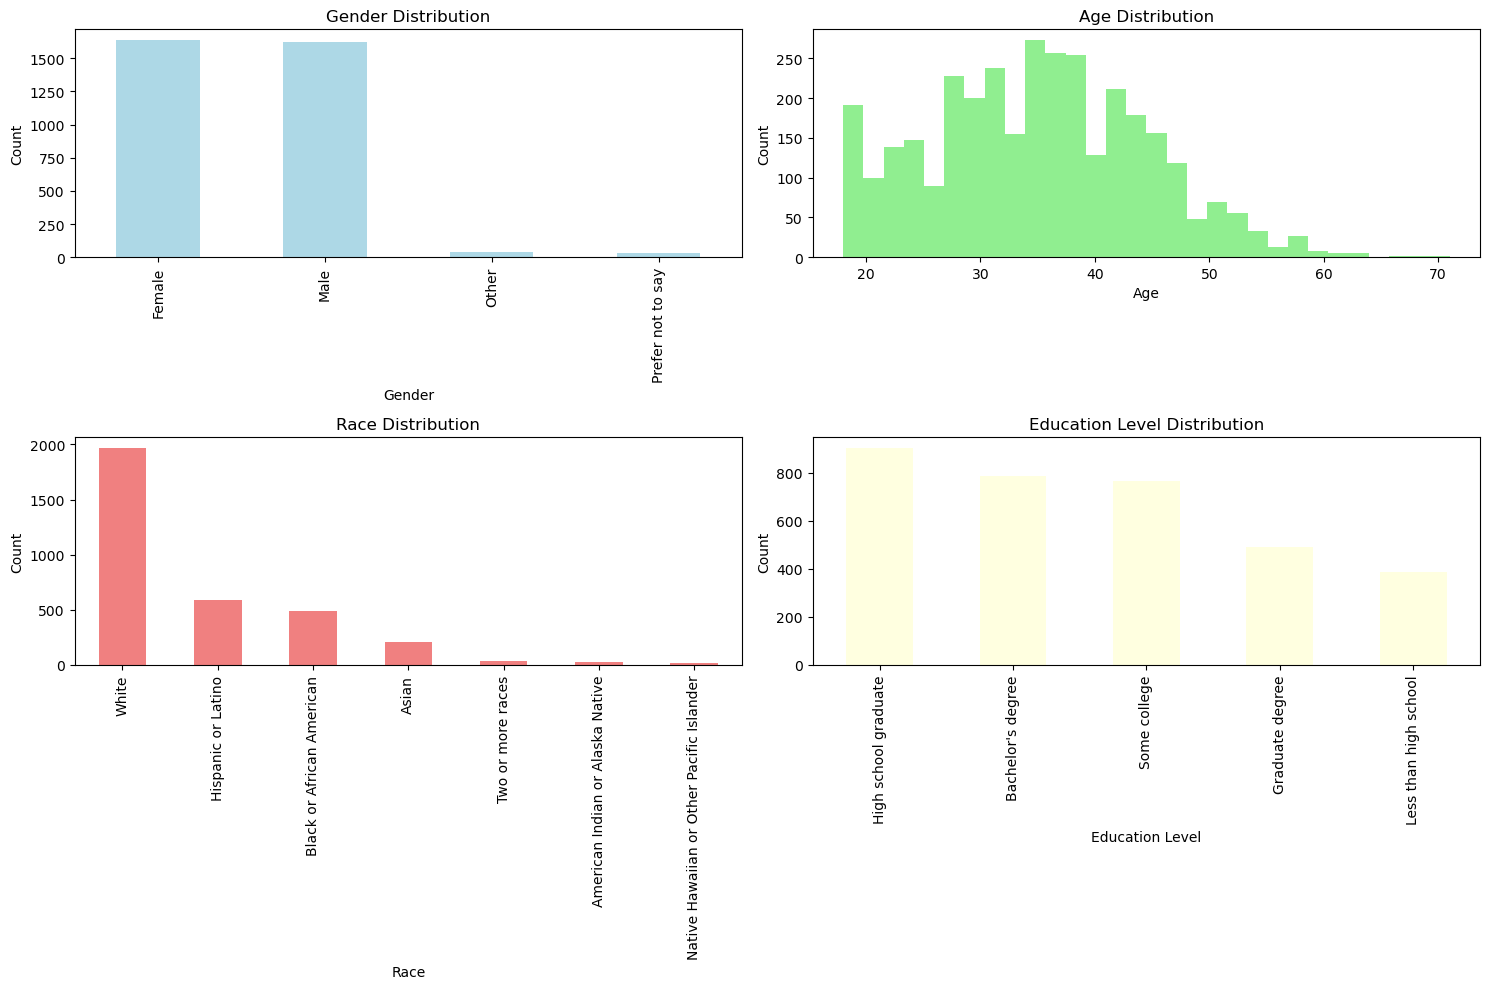

In [4]:
# Visualizing demographic characteristics of the participants without linking to vaccination status

# For demonstration, let's create a few visualizations for different demographic aspects
plt.figure(figsize=(15, 10))

# Gender distribution
plt.subplot(2, 2, 1)
cleaned_data['Gender'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Age distribution
plt.subplot(2, 2, 2)
cleaned_data['Age'].plot(kind='hist', bins=30, color='lightgreen')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Race distribution
plt.subplot(2, 2, 3)
cleaned_data['Race'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')

# Education level distribution
plt.subplot(2, 2, 4)
cleaned_data['Education'].value_counts().plot(kind='bar', color='lightyellow')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


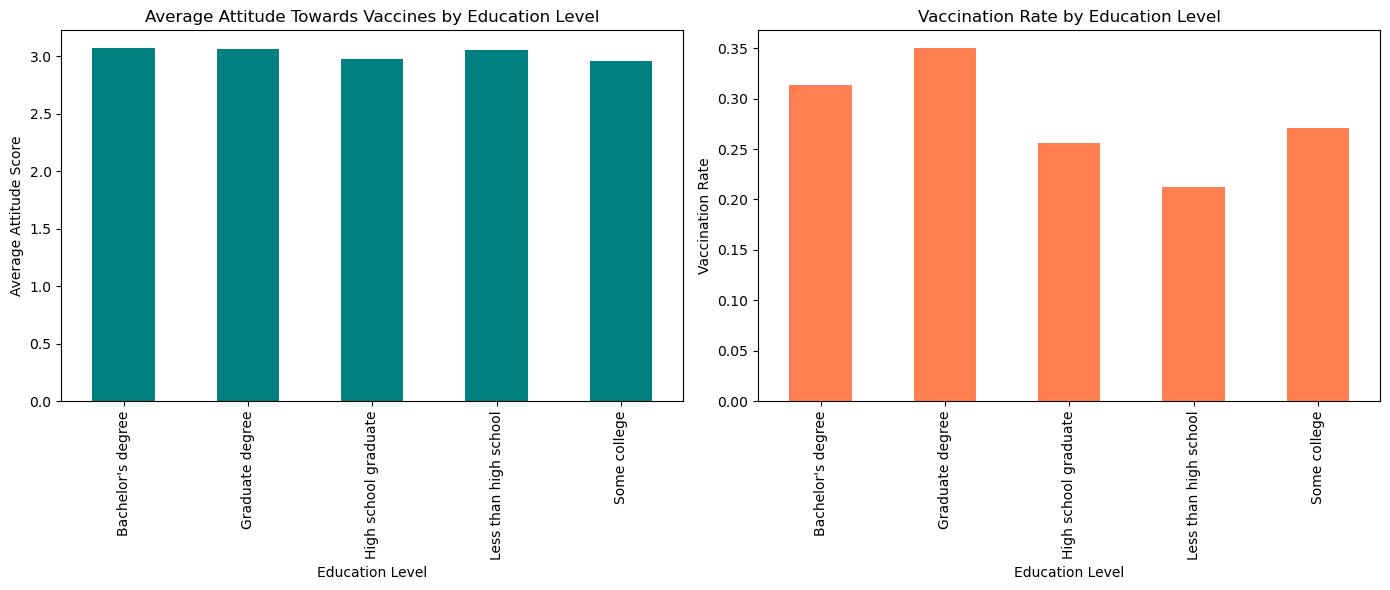

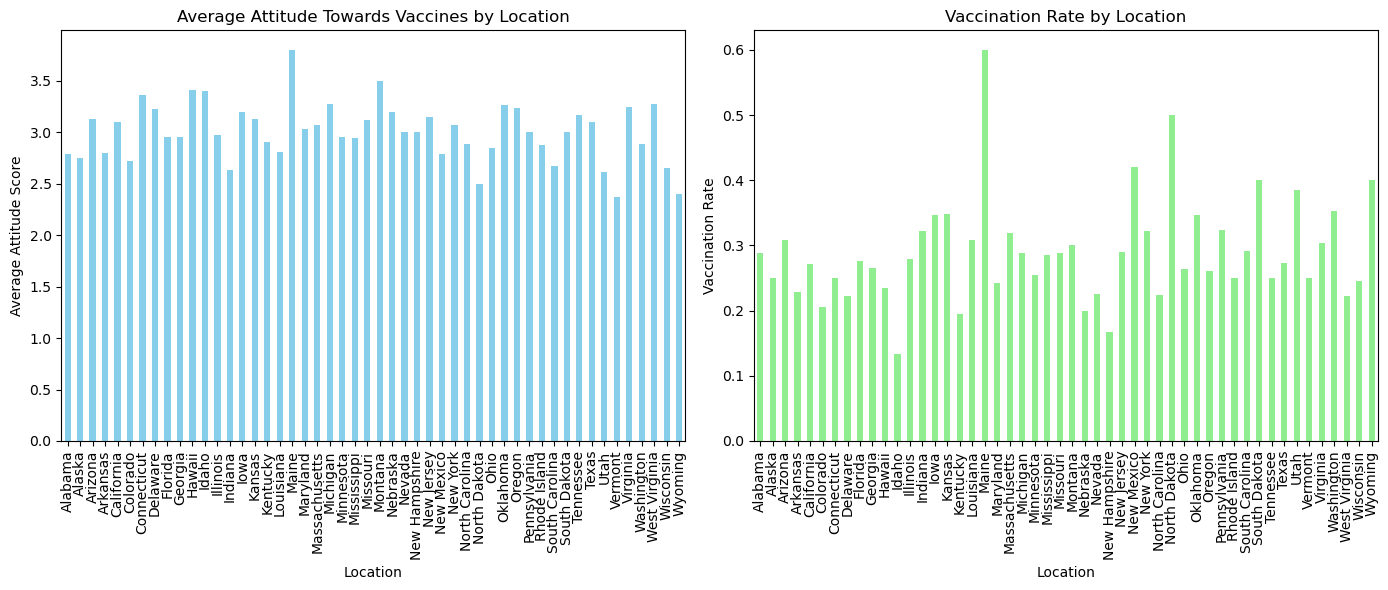

In [5]:
# Education Level Impact Analysis
# Group by Education and analyze attitudes and vaccination rates
education_attitudes = cleaned_data.groupby('Education')['Attitude_Towards_Vaccines'].mean()
education_vaccination = cleaned_data['Previous_Vaccine_Status'].groupby(cleaned_data['Education']).mean()

# Visualizing the impact of Education Level on Attitudes and Vaccination Decisions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
education_attitudes.plot(kind='bar', color='teal')
plt.title('Average Attitude Towards Vaccines by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Attitude Score')

plt.subplot(1, 2, 2)
education_vaccination.plot(kind='bar', color='coral')
plt.title('Vaccination Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Vaccination Rate')

plt.tight_layout()
plt.show()

# Geographical Patterns Analysis
# Group by Location and analyze attitudes and vaccination rates
location_attitudes = cleaned_data.groupby('Location')['Attitude_Towards_Vaccines'].mean()
location_vaccination = cleaned_data['Previous_Vaccine_Status'].groupby(cleaned_data['Location']).mean()

# Visualizing geographical patterns in vaccine attitudes and uptake
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
location_attitudes.plot(kind='bar', color='skyblue')
plt.title('Average Attitude Towards Vaccines by Location')
plt.xlabel('Location')
plt.ylabel('Average Attitude Score')

plt.subplot(1, 2, 2)
location_vaccination.plot(kind='bar', color='lightgreen')
plt.title('Vaccination Rate by Location')
plt.xlabel('Location')
plt.ylabel('Vaccination Rate')

plt.tight_layout()
plt.show()

Of course it is not that different because I did not simulate the correlation between location and vaccination rates/attitudes. 

In [6]:
# Baseline Equivalence Check
# We will compare key demographic variables across the groups (if the group data is available)

# Check if 'Assigned_Group' or similar column is in the data for group assignment
group_column_exists = 'Assigned_Group' in merged_data.columns

# If the group assignment data is available, perform the equivalence check
if group_column_exists:
    # Comparing demographics across groups
    group_comparison_age = cleaned_data.groupby('Assigned_Group')['Age'].mean()
    group_comparison_gender = cleaned_data.groupby('Assigned_Group')['Gender'].value_counts(normalize=True)
    group_comparison_education = cleaned_data.groupby('Assigned_Group')['Education'].value_counts(normalize=True)
    group_comparison_race = cleaned_data.groupby('Assigned_Group')['Race'].value_counts(normalize=True)
    group_comparison_attitude = cleaned_data.groupby('Assigned_Group')['Attitude_Towards_Vaccines'].mean()

    # Display the comparison results
    (group_comparison_age, group_comparison_gender, group_comparison_education, group_comparison_race, group_comparison_attitude)
else:
    message = "Group assignment data ('Assigned_Group') is not available in the merged dataset."
    message

In [7]:
# Perform Baseline Equivalence Check by comparing demographics and attitudes across groups
group_comparison_age = cleaned_data.groupby('Assigned_Group')['Age'].mean()
group_comparison_gender = cleaned_data.groupby('Assigned_Group')['Gender'].value_counts(normalize=True)
group_comparison_education = cleaned_data.groupby('Assigned_Group')['Education'].value_counts(normalize=True)
group_comparison_race = cleaned_data.groupby('Assigned_Group')['Race'].value_counts(normalize=True)
group_comparison_attitude = cleaned_data.groupby('Assigned_Group')['Attitude_Towards_Vaccines'].mean()

# Effectiveness Analysis: Compare vaccination rates among the different groups
vaccination_effectiveness = cleaned_data.groupby('Assigned_Group')['Vaccinated_After_Baseline'].value_counts(normalize=True) * 100

# Display the results
(group_comparison_age, group_comparison_gender, group_comparison_education, group_comparison_race, group_comparison_attitude, vaccination_effectiveness)

(Assigned_Group
 Control       35.059649
 Emotion Ad    34.929038
 Reason Ad     34.950893
 Name: Age, dtype: float64,
 Assigned_Group  Gender           
 Control         Male                 0.495614
                 Female               0.478070
                 Prefer not to say    0.014035
                 Other                0.012281
 Emotion Ad      Male                 0.497666
                 Female               0.486461
                 Other                0.009337
                 Prefer not to say    0.006536
 Reason Ad       Female               0.508929
                 Male                 0.469643
                 Other                0.012500
                 Prefer not to say    0.008929
 Name: Gender, dtype: float64,
 Assigned_Group  Education            
 Control         High school graduate     0.282456
                 Bachelor's degree        0.240351
                 Some college             0.221930
                 Graduate degree          0.154386
        

In [8]:
import statsmodels.api as sm

# Re-convert to ensure only 0s and 1s
cleaned_data['Vaccinated_Numeric'] = cleaned_data['Vaccinated_After_Baseline'].replace({'Yes': 1, 'No': 0})
cleaned_data['Group_Numeric'] = full_merged_data['Assigned_Group'].replace({
    'Control': 0,
    'Emotion Ad': 1,
    'Reason Ad': 2
})

# Re-run the logistic regression with the cleaned data
X_cleaned = cleaned_data[['Group_Numeric']]  # Independent variable
y_cleaned = cleaned_data['Vaccinated_Numeric']  # Dependent variable

X_cleaned = sm.add_constant(X_cleaned)
logit_model_cleaned = sm.Logit(y_cleaned, X_cleaned)
result_cleaned = logit_model_cleaned.fit()

logit_summary_cleaned = result_cleaned.summary2()
logit_summary_cleaned

E:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
E:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Optimization terminated successfully.
         Current function value: 0.624743
         Iterations 5


C:\Users\pc\AppData\Local\Temp/ipykernel_52088/3649016993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Vaccinated_Numeric'] = cleaned_data['Vaccinated_After_Baseline'].replace({'Yes': 1, 'No': 0})
C:\Users\pc\AppData\Local\Temp/ipykernel_52088/3649016993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Group_Numeric'] = full_merged_data['Assigned_Group'].replace({
E:\python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas a

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit              Pseudo R-squared: 0.001    
Dependent Variable: Vaccinated_Numeric AIC:              4166.0407
Date:               2023-12-09 00:30   BIC:              4178.2628
No. Observations:   3331               Log-Likelihood:   -2081.0  
Df Model:           1                  LL-Null:          -2082.1  
Df Residuals:       3329               LLR p-value:      0.14376  
Converged:          1.0000             Scale:            1.0000   
No. Iterations:     5.0000                                        
-------------------------------------------------------------------
                 Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
-------------------------------------------------------------------
const            0.8309    0.0589  14.1014  0.0000   0.7154  0.9464
Group_Numeric   -0.0661    0.0452  -1.4615  0.1439  -0.1547  0.0225
==================================================================

"""

In [9]:
# Example: Analyzing by Gender
gender_effectiveness = cleaned_data.groupby(['Gender', 'Assigned_Group'])['Vaccinated_Numeric'].mean()

# Example: Analyzing by Age Group (creating age groups for analysis)
age_bins = pd.cut(cleaned_data['Age'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 90, 100])
age_group_effectiveness = cleaned_data.groupby([age_bins, 'Assigned_Group'])['Vaccinated_Numeric'].mean()

In [10]:
# Sensitivity Analysis
# Testing the robustness of the findings using a different model specification
# Including an interaction term between Age and Assigned Group
cleaned_data['Age_x_Group'] = cleaned_data['Age'] * cleaned_data['Group_Numeric']
X_sensitivity = cleaned_data[['Group_Numeric', 'Age', 'Age_x_Group']]
X_sensitivity = sm.add_constant(X_sensitivity)
logit_model_sensitivity = sm.Logit(cleaned_data['Vaccinated_Numeric'], X_sensitivity)
result_sensitivity = logit_model_sensitivity.fit()

# Display results of subgroup and sensitivity analyses
subgroup_results = (gender_effectiveness, age_group_effectiveness)
sensitivity_summary = result_sensitivity.summary2()
(subgroup_results, sensitivity_summary)

C:\Users\pc\AppData\Local\Temp/ipykernel_52088/3261202336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Age_x_Group'] = cleaned_data['Age'] * cleaned_data['Group_Numeric']


Optimization terminated successfully.
         Current function value: 0.624133
         Iterations 5


E:\python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


((Gender             Assigned_Group
  Female             Control           0.717431
                     Emotion Ad        0.683301
                     Reason Ad         0.668421
  Male               Control           0.683186
                     Emotion Ad        0.673546
                     Reason Ad         0.682510
  Other              Control           0.714286
                     Emotion Ad        0.600000
                     Reason Ad         0.500000
  Prefer not to say  Control           0.687500
                     Emotion Ad        0.285714
                     Reason Ad         0.500000
  Name: Vaccinated_Numeric, dtype: float64,
  Age        Assigned_Group
  (0, 18]    Control           0.800000
             Emotion Ad        0.634146
             Reason Ad         0.615385
  (18, 30]   Control           0.684211
             Emotion Ad        0.643963
             Reason Ad         0.670846
  (30, 40]   Control           0.677282
             Emotion Ad        0.688

Obviously, since it is simulation data, naturally our RCT is completely useless. 

In [11]:
# Convert 'Vaccinated_After_Baseline' from 'Yes'/'No' to 1/0
full_merged_data['Vaccinated_Numeric'] = full_merged_data['Vaccinated_After_Baseline'].map({'Yes': 1, 'No': 0})

# Ensure 'Assigned_Group' has the correct format
# If necessary, adjust the group names to match your dataset
treatment_groups = ['Reason Ad', 'Emotion Ad']
control_group = 'Control'
ate_results = {}

for group in treatment_groups:
    treated_mean = full_merged_data[full_merged_data['Assigned_Group'] == group]['Vaccinated_Numeric'].mean()
    control_mean = full_merged_data[full_merged_data['Assigned_Group'] == control_group]['Vaccinated_Numeric'].mean()
    ate_results[group] = treated_mean - control_mean

# ITT Analysis
model_itt = smf.ols('Vaccinated_Numeric ~ C(Assigned_Group)', data=full_merged_data).fit()
itt_summary = model_itt.summary()
## we can do imputations here, we can also include sensitivity analysis of best and worst.
# Print Results
print("Average Treatment Effects (ATE):")
for group, ate in ate_results.items():
    print(f"  {group}: {ate}")

print("\nIntention-to-Treat Analysis (ITT):")
print(itt_summary)

Average Treatment Effects (ATE):
  Reason Ad: -0.019109608792466815
  Emotion Ad: -0.015389646269208801

Intention-to-Treat Analysis (ITT):
                            OLS Regression Results                            
Dep. Variable:     Vaccinated_Numeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7067
Date:                Sat, 09 Dec 2023   Prob (F-statistic):              0.493
Time:                        00:30:36   Log-Likelihood:                -2957.2
No. Observations:                4500   AIC:                             5920.
Df Residuals:                    4497   BIC:                             5940.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      

In [12]:
# Example of categorizing 'Age' into groups
cleaned_data['age_group'] = pd.cut(cleaned_data['Age'], bins=[0, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])

# Now run the model with 'age_group'
model_heterogeneity = smf.ols('Vaccinated_Numeric ~ C(Assigned_Group) * age_group + C(Assigned_Group) * Gender', data=cleaned_data).fit()
print(model_heterogeneity.summary())


                            OLS Regression Results                            
Dep. Variable:     Vaccinated_Numeric   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9851
Date:                Sat, 09 Dec 2023   Prob (F-statistic):              0.477
Time:                        00:30:38   Log-Likelihood:                -2169.9
No. Observations:                3331   AIC:                             4382.
Df Residuals:                    3310   BIC:                             4510.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

C:\Users\pc\AppData\Local\Temp/ipykernel_52088/428168535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['age_group'] = pd.cut(cleaned_data['Age'], bins=[0, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])


In [13]:
full_merged_data['Vaccinated_Numeric'] = full_merged_data['Vaccinated_After_Baseline'].replace({'Yes': 1, 'No': 0})
compliance_data = full_merged_data.dropna(subset=['Vaccinated_After_Baseline'])
compliance_model = smf.ols('Vaccinated_Numeric ~ C(Assigned_Group)', data=compliance_data).fit()
print(compliance_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Vaccinated_Numeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7067
Date:                Sat, 09 Dec 2023   Prob (F-statistic):              0.493
Time:                        00:30:38   Log-Likelihood:                -2957.2
No. Observations:                4500   AIC:                             5920.
Df Residuals:                    4497   BIC:                             5940.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Don't be confused, I'm setting it up so that vaccination rates have nothing to do with our RCTs, and the probability of later vaccination is only related to one's own attitudes, since I'm assuming that people never look at Facebook ads!